<a href="https://colab.research.google.com/github/MisterGusMan/IGTI_Bootcamp_ML/blob/main/M%C3%B3dulo%204/%20Trabalho_Pr%C3%A1tico_do_M%C3%B3dulo_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O objetivo deste exercício é classificar imagens através do uso de rede neural. Vamos treinar  um modelo  de  rede  neural  para  classificação  de  imagens  de  roupas.  Teremos uma visão geral do uso do TensorFlow.

https://www.tensorflow.org/tutorials/keras/classification?hl=pt-br

Importando o Keras para contruir e treinar modelos do TensorFlow:

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
print(tf.__version__)

2.5.0


Importar a base de dados Fashion MNIST:

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images , train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Carregando a base de dados que retorna quatro NumPyarrays:

▪Os arrays train_images e train_labels são o conjunto de treinamento, os dados do modelo usados para aprender.

▪O modelo é testado com o conjunto de teste, os arraystest_images e test_labels. As  imagens  são  arrays NumPy  de  28x28,  com  os  valores  de  pixels  entre  0  to  255. Os labels (alvo da classificação) são um array de inteiros, no intervalo de 0 a 9. 

Cada  imagem  é  mapeada  com  um  só label, já que os nomes  das  classes não  são incluídos  na  base  de  dados. Armazenaremos os  dados  aqui  para  usá-los mais  tarde  quando formos plotar as imagens:

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandals', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

Exploração dos dados:

Vamos  explorar  o  formato  da  base  de  dados  antes  de  treinar  o  modelo.  O  próximo comando  mostra  que  existem  60.000  imagens  no  conjunto  de  treinamento,  e  cada imagem é representada em 28 x 28 pixels:

In [ ]:
train_images.shape

(60000, 28, 28)

Do mesmo modo, existem 60.000 labels no conjunto de treinamento.

In [ ]:
len(train_images)

60000

Cada label é um inteiro entre 0 e 9.

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Repetindo a análise com o conjunto teste:

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_images)

10000

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

# Pré-processamento dos dados:

Os  dados  precisam  ser  pré-processados  antes  de  treinar  a  rede.  Se  você  inspecionar  a primeira imagem do conjunto de treinamento,  você verá que os valores dos pixels estão entre 0 e 255:

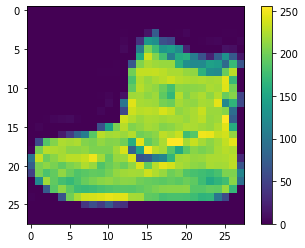

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

Os  dados  precisam  ser  pré-processados  antes  de  treinar  a  rede.  Se  você  inspecionar  a primeira imagem do conjunto de treinamento,  você verá que os valores dos pixels estão entre 0 e 255.Escalaremos  esses  valores  no  intervalo  de  0  e  1  antes  de  alimentar  o  modelo  da  rede neural.  Para  fazer  isso,  dividiremos  os  valores  por  255.  É importante  que  o conjunto  de treinamento e o conjunto de teste possam ser pré-processados do mesmo modo.

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Para  verificar  que  os  dados  estão  no  formato  correto  e  que  estamos  prontos  para construir  e  treinar  a  rede,  vamos  mostrar  as  primeiras  25  imagens  doconjunto  de treinamentoe mostrar o nome das classes de cada imagem abaixo.

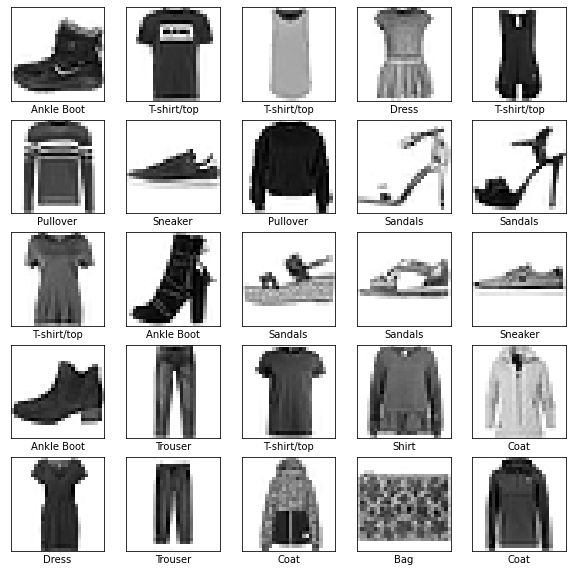

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

# Contruindo o modelo:
Construir  a  rede  neural  requer configurar  as  camadas  do  modeloe,depois,  compilar  o modelo.

## Montar as camadas:
O principal bloco de construção da rede neural é a camada (layer). As camadas (layers) extraem  representações dos  dados  inseridos  na  rede.  Com  sorte,  essas  representações são significativas para o problema.

Muito do deep learning consiste em encadear   simples   camadas.   Muitas   camadas, como tf.keras.layers.Dense, têm parâmetros que são aprendidos durante o treinamento.

In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (28, 28)),
                          keras.layers.Dense(128, activation = 'relu'),
                          keras.layers.Dense(10, activation = 'softmax')
])

A  primeira  camada  da  rede,tf.keras.layers.Flatten,  transforma  o  formato  da  imagem  de um  array  de  imagens  de  duas  dimensões  (of  28  by  28  pixels)  para  um  array  de  uma dimensão (de 28 * 28 = 784 pixels). 

Pense nessa camada como camadas não empilhadas de pixels de uma imagem e os enfileire. Essa camada não tem parâmetros para aprender; ela só reformata os dados.Depois  dos  pixels  serem  achatados,  a  rede consistede  uma  sequência  de  duas camadas tf.keras.layers.Dense. Essas são camadas neuraisdenselyconnected, oufullyconnected.  A  primeira  camadaDensetem  128  nós  (ou  neurônios).  

A  segunda  (e última)  camada  é uma softmax de  10  nós, que  retorna  um  array  de  10  probabilidades, cuja  soma  resulta  em  1. Cada  nó contém um  valor  que  indica  a  probabilidade  de  que aquela imagem pertença a uma das 10 classes.

## Compilação do modelo:
Antes   do   modelo   estar   pronto   para   o   treinamento, são necessárias algumas configurações. Essas configurações serão adicionadas no passo de compilação:

▪Função  Loss: essa função mede  quão  preciso o  modelo  é  durante  o  treinamento. Queremos minimizar a função para guiar o modelo para a direção certa.

▪Optimizer:  isso  é  como  o  modelo  se  atualiza  com  base  no  dado  que  ele  vê  e  sua função loss.

▪Métricas: usadas para monitorar os passos de treinamento e teste. O exemplo abaixo usa a acurácia, a fração das imagens que foram classificadas corretamente.

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Treinando o modelo:
Treinar a rede neural requer os seguintes passos:

▪Alimentar o  modelo com  os  dados  de  treinamento.  Neste  exemplo,  os  dados  de treinamento são os arrays train_images e train_labels.

▪O modelo aprende como associar as imagens às labels.

▪Perguntamos  ao  modelo  para  fazer  previsões  sobre  o  conjunto  de  teste. Nesse exemplo, o   array test_images.   Verificamos   se   as   previsões   combinaram   com as labels do array test_labels. Para  começar  a  treinar,  chame  o  método model.fit, assim  chamado porque  ele “encaixa” o modelo no conjunto de treinamento:

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4991 - accuracy: 0.8252
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3764 - accuracy: 0.8642
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3371 - accuracy: 0.8767
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3139 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2943 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2812 - accuracy: 0.8955
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2698 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2583 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2494 - accuracy: 0.9082
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

À  medida  que  o  modelo  treina,  as  métricas  loss  e  acurácia  são  mostradas.  O  modelo atinge uma acurácia de 0.88 (ou 88%) com o conjunto de treinamento.

## Avaliando a acurácia:
Após a compilação, compararemos como o modelo performou com o conjunto de teste:

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest Accuracy: ', test_acc)

313/313 - 0s - loss: 0.3252 - accuracy: 0.8894

Test Accuracy:  0.8894000053405762


Aacurácia com o conjunto de teste é um pouco menor do que a acurácia de treinamento. Essa diferença entre as duas acurácias representa umoverfitting. Overfitting é um modelo de aprendizado de máquina queperformou de maneira pior em um conjunto de entradas novas e não usadas anteriormente.

## Gerando predições:
Com o modelo treinado, o usaremos para predições de algumas imagens:

In [ ]:
pred = model.predict(test_images)

Aqui, o modelo previu alabelde cada imagem no conjunto de treinamento. Vamos olhar na primeira predição:

In [ ]:
pred[0]

array([8.3124309e-05, 1.0719949e-08, 7.5944712e-08, 3.5128614e-10,
       6.7507848e-08, 2.7652955e-04, 3.1523209e-07, 4.5787510e-03,
       3.5049711e-06, 9.9505758e-01], dtype=float32)

A predição é um array de 10 números. Eles representam uma confiança do modelo que a imagem  corresponde  a  cada  um  dos  diferentes  artigos  de  roupa.  Podemos  ver que cada label tem um maior valor de confiança.

In [ ]:
np.argmax(pred[0])

9

Podemos mostrar graficamente como se parece em um conjunto total de previsão de 10 classes:

In [ ]:
def plot_image(i , pred_array, true_label, img):
  pred_array, true_label, img = pred_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)

  pred_label = np.argmax(pred_array)
  if pred_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel('{} {:2.0f}% ({})'.format(class_names[pred_label],
                                       100 * np.max(pred_array),
                                       class_names[true_label]),
                                       color = color)

def plot_val_array(i , pred_array, true_label):
  pred_array, true_label = pred_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), pred_array, color = '#777777')
  plt.ylim([0, 1])
  pred_label = np.argmax(pred_array)

  thisplot[pred_label].set_color('red')
  thisplot[true_label].set_color('blue')

Vamos olhar a previsão imagem na posição 0, do array de predição:

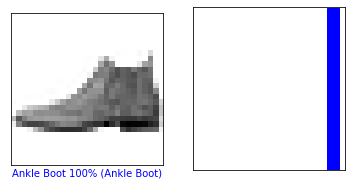

In [ ]:
i = 0
plt.figure(figsize = (6,3))
plt.subplot(1, 2, 1)
plot_image(i , pred, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_val_array(i, pred, test_labels)

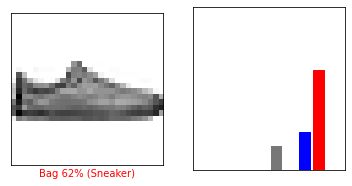

In [ ]:
i = 12
plt.figure(figsize = (6,3))
plt.subplot(1, 2, 1)
plot_image(i , pred, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_val_array(i, pred, test_labels)

Vamos plotar algumas das previsõesdo modelo. Labels preditas corretamente são azuis e as predições erradas são vermelhas. O número dá a porcentagem (de 100) das labels preditas. Note que o modelo pode errar:

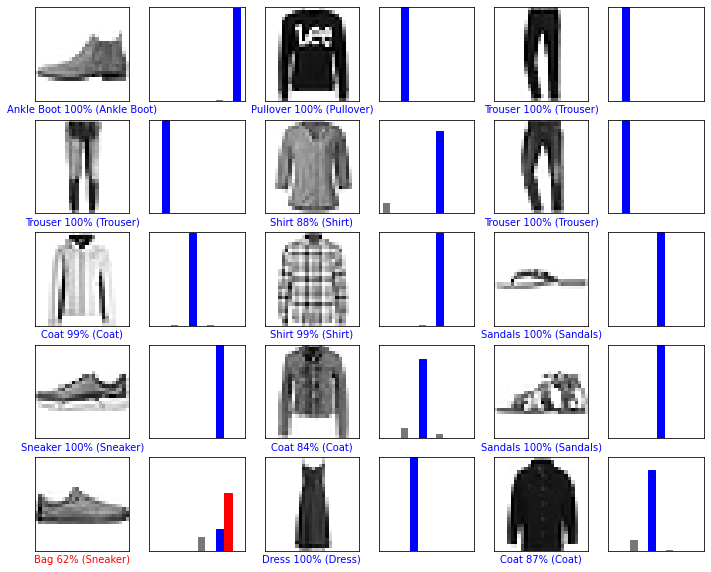

In [ ]:
# Plota o primeiro X test_images, as labels preditas e labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 *num_cols, 2 * num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2 * num_cols, 2 *i+1) 
  plot_image(i, pred, test_labels, test_images)
  plt.subplot(num_rows, 2 * num_cols, 2 *i+2) 
  plot_val_array(i, pred, test_labels)

Finalmente, usaremos o modelo treinado para fazer a predição de uma única imagem:

In [ ]:
# Grab an image from the test dataset.
img = test_images[0]

print(img.shape)


(28, 28)


Modelos tf.keras são   otimizados   para   fazer   predições   em batch,   ou   coleções,   de exemplos  de  uma  vez. Assim,  mesmo  que  usemos  uma  única  imagem,  precisamos adicionar em uma lista.

In [ ]:
# Adiciona a imagem em um batch que possui um só membro.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Agora prediremos a label correta para essa imagem:

In [ ]:
predictions_single = model.predict(img)

print(predictions_single)


[[8.3124149e-05 1.0719949e-08 7.5944712e-08 3.5128681e-10 6.7507727e-08
  2.7652906e-04 3.1523209e-07 4.5787469e-03 3.5049611e-06 9.9505758e-01]]


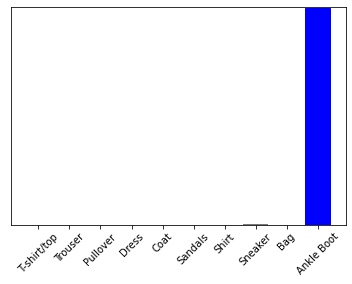

In [ ]:
plot_val_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

model.predict retorna a lista de listas — uma lista para cada imagem em um batch de dados. Pegue a predição de nossa (única) imagem no batch:

In [ ]:
np.argmax(predictions_single[0])

9

E, como antes, o modelo previu a label como 9.

Usamos a base de dados Fashion MNIST,que contém 70,000 imagens em tons de cinza em 10 categorias. As imagens mostram artigos individuais de roupas com baixa resolução (28 por 28 pixels).Fashion MNIST tem como intenção substituir a clássica base de dadosMNIST.
Usamos  60,000  imagens  para  treinar  nossa  rede  e  10,000  imagens  para  avaliar  quão precisamente  nossa  rede  aprendeu  a  classificar  as  imagens.  Se  quiser,  você  pode acessar a Fashion MNIST diretamente do TensorFlow.